In [1]:
library(dplyr)
library(ggplot2)
library(zoo)

Warning message:
"pakiet 'dplyr' został zbudowany w wersji R 4.2.2"

Dołączanie pakietu: 'dplyr'


Następujące obiekty zostały zakryte z 'package:stats':

    filter, lag


Następujące obiekty zostały zakryte z 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"pakiet 'zoo' został zbudowany w wersji R 4.2.2"

Dołączanie pakietu: 'zoo'


Następujące obiekty zostały zakryte z 'package:base':

    as.Date, as.Date.numeric




In [19]:
install.packages('diptest')

Instalowanie pakietu w 'C:/Users/admin/AppData/Local/R/win-library/4.2'
(ponieważ 'lib' nie jest określony)



pakiet 'diptest' został pomyślnie rozpakowany oraz sumy MD5 zostały sprawdzone

Pobrane pakiety binarne są w
	C:\Users\admin\AppData\Local\Temp\RtmpwHFWCX\downloaded_packages


In [166]:
w = 10
h = 8

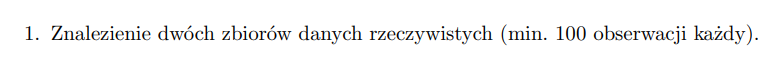

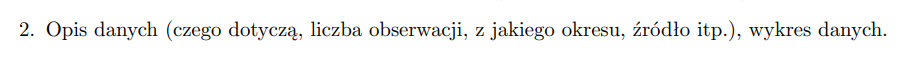

dane: https://www.kaggle.com/datasets/loveall/appliances-energy-prediction

T1, Temperature in kitchen area, in Celsius <br>
T5, Temperature in bathroom, in Celsius

In [146]:
f <- read.csv('KAG_energydata_complete.csv', header=TRUE)
f <- na.omit(f)

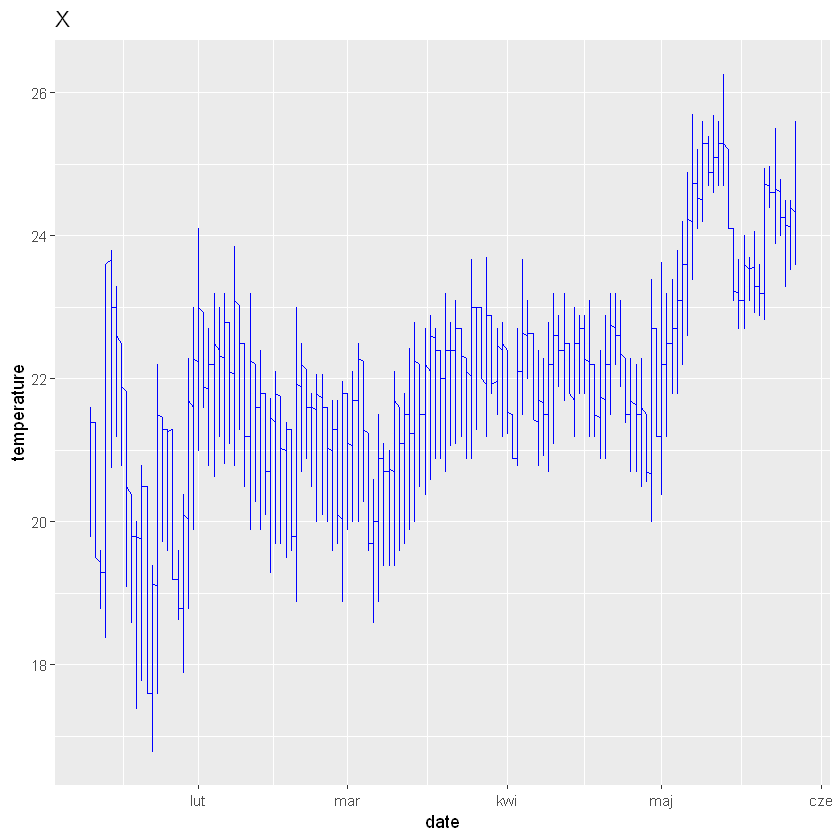

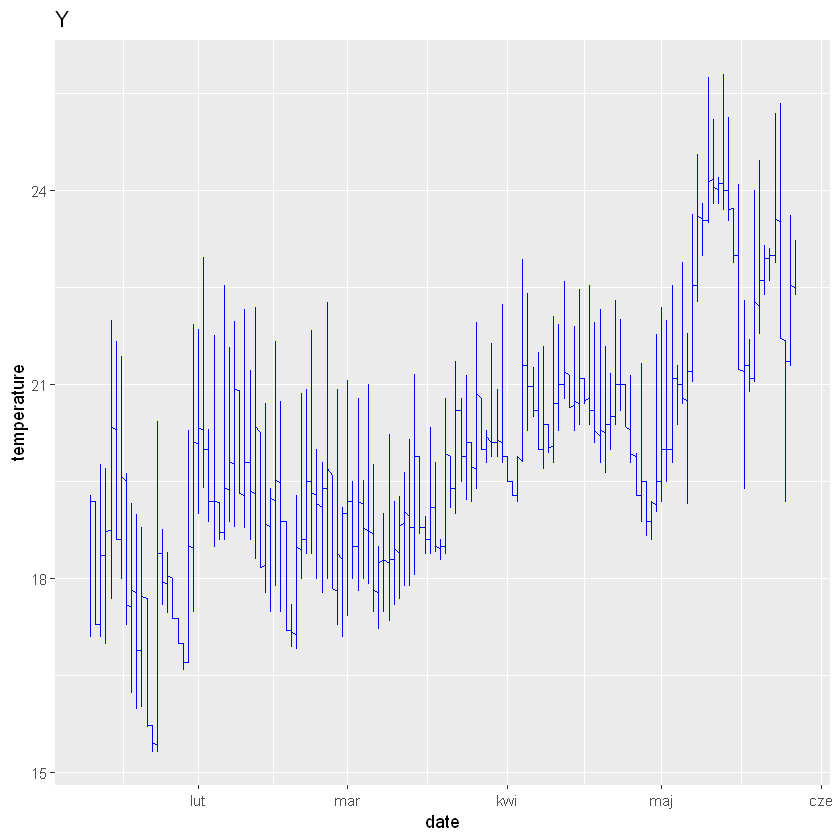

In [167]:
#head(p)
X <- f$T1
Y <- f$T5
dates <- as.Date(f$date)
p1 <- ggplot() + geom_line(aes(dates, X), color = "blue") + labs(x="date", y="temperature") + ggtitle("X")
p2 <- ggplot() + geom_line(aes(dates, Y), color = "blue") + labs(x="date", y="temperature") + ggtitle("Y")
ggsave(plot = p1, width = w, height = h, dpi = 300, filename = "X.jpg")
ggsave(plot = p2, width = w, height = h, dpi = 300, filename = "Y.jpg")
p1
p2

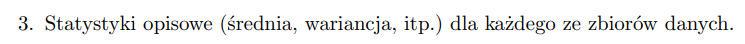

### X

In [105]:
n <- length(X)

In [106]:
##średnia 
mean(X)
sum(X)/n

[1] 21.68657

[1] 21.68657

In [107]:
## wariancja
var(X)
sum((X-mean(X))^2)/(n-1)

[1] 2.579447

[1] 2.579447

In [108]:
#odchylenie
sqrt(var(X))

[1] 1.606066

In [109]:
## mediana 
n
median(X)
sort(X)[ceiling(n/2)]

[1] 19735

[1] 21.6

[1] 21.6

In [110]:
### kwantyle
Q <- quantile(X, c(0.25, 0.5, 0.75))
Q

25%   50%   75% 
20.76 21.60 22.60

In [170]:
df <- data.frame(x = density(X)$x, y = density(X)$y)


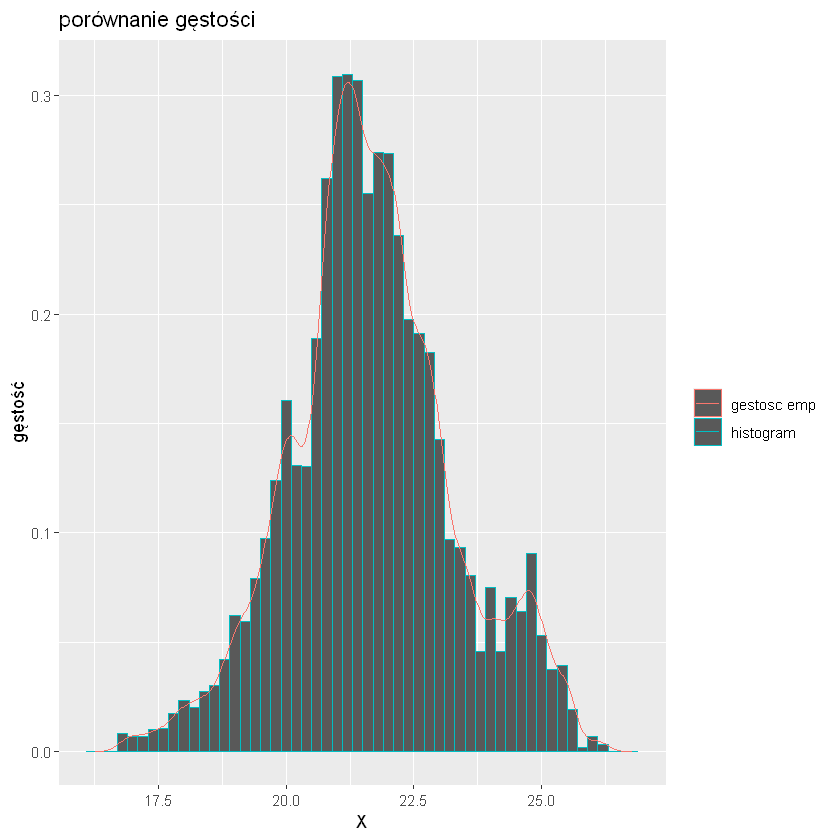

In [171]:
##wykresy
#hist(X, col='skyblue', main='Dane Y',freq=FALSE,  ylim = c(0,0.7), breaks=70)
#lines(density(X), col = "red")
p <- ggplot() + geom_histogram(aes(x = X, y = ..density.., color="histogram"), binwidth=0.2) +
geom_line(aes(x = df$x, y = df$y, color="gestosc emp")) + ylab("gęstość") + ggtitle("porównanie gęstości") +  
theme(legend.title = element_blank()) 
p 

ggsave(plot = p, width = w, height = h, dpi = 300, filename = "x_hist.jpg")

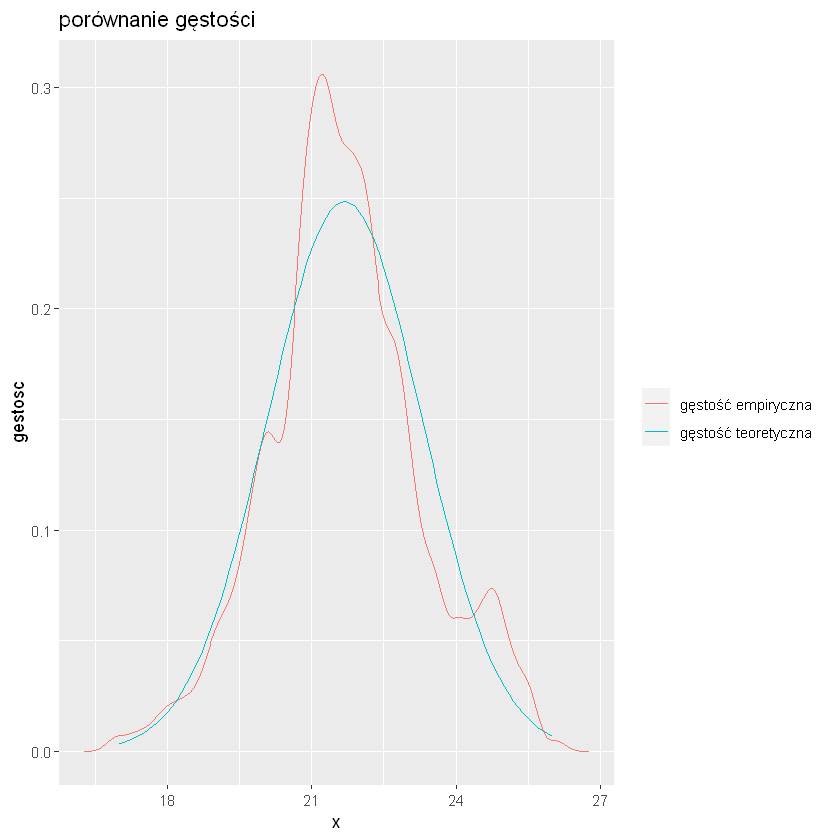

In [172]:
p <- ggplot() + geom_line(aes(x = df$x, y = df$y, color='gęstość empiryczna')) + 
geom_line(aes(x=seq(17,26,0.1), y = dnorm(seq(17,26,0.1), mean(X), sqrt(var(X))), color="gęstość teoretyczna")) +
xlab("x") + ylab("gestosc")  +  theme(legend.title = element_blank()) + ggtitle("porównanie gęstości") 
p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "x_dens.jpg")

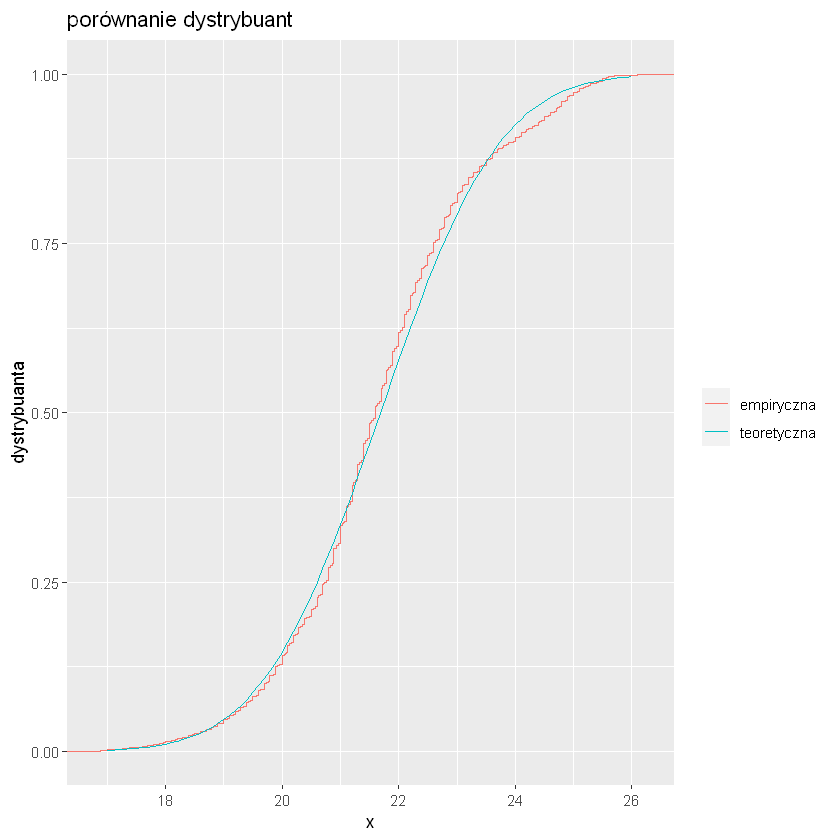

In [173]:
p <- ggplot() + stat_ecdf(aes(X, color="empiryczna")) +
geom_line(aes(x=seq(17,26,0.1), y = pnorm(seq(17,26,0.1), mean(X), sqrt(var(X))), color="teoretyczna"))+
xlab("x") + ylab("dystrybuanta")  +  theme(legend.title = element_blank()) + ggtitle("porównanie dystrybuant") +
theme(legend.title = element_blank()) 
p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "x_dis.jpg")

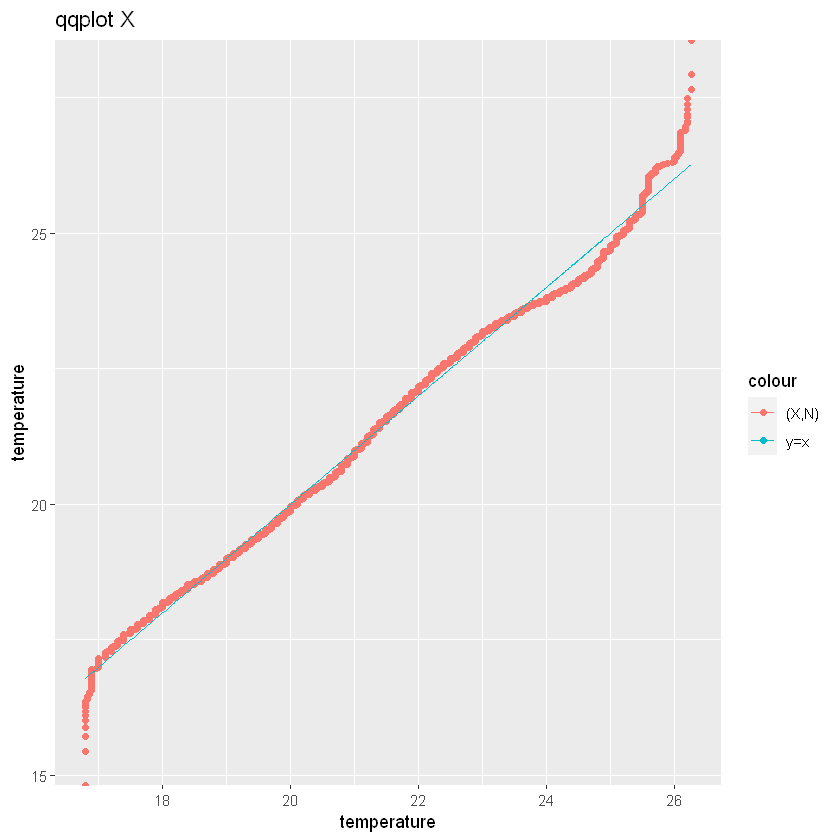

In [174]:
p2 <- ggplot() + 
  geom_point(aes(x= sort(X), y =  qnorm(seq(0,1,length.out = n), mean(X), sqrt(var(X))), color="(X,N)")) +
  geom_line(aes(x= X, y = X, color="y=x"))  + ggtitle('qqplot X') + labs(x='temperature', y='temperature')
p2
ggsave(plot = p2, width = w, height = h, dpi = 300, filename = "x_qq.jpg")

testy na dwumodalnosc rozkładów - histogramy wyszły takie smieszne, jakby z kilkoma grzbietami wiec stwierdzam że nie są unimodalne (czyli nie sa do konca normalne)

In [117]:
library('diptest')
dip.test(Y)
dip.test(X) ## p <0.05 - przynajmniej dwumodalny
dip.test(rnorm(1000,0,1)) ## p >0.05 -- > unimodalny normalny


	Hartigans' dip test for unimodality / multimodality

data:  Y
D = 0.011822, p-value < 2.2e-16
alternative hypothesis: non-unimodal, i.e., at least bimodal



	Hartigans' dip test for unimodality / multimodality

data:  X
D = 0.013023, p-value < 2.2e-16
alternative hypothesis: non-unimodal, i.e., at least bimodal



	Hartigans' dip test for unimodality / multimodality

data:  rnorm(1000, 0, 1)
D = 0.0091598, p-value = 0.8922
alternative hypothesis: non-unimodal, i.e., at least bimodal


testy na normalnosc jeszcze

In [118]:
ks.test((X-mean(X))/sqrt(var(X)), "pnorm")
ks.test((Y-mean(Y))/sqrt(var(Y)), "pnorm")

Warning message in ks.test.default((X - mean(X))/sqrt(var(X)), "pnorm"):
"wartości powtórzone nie powinny być obecne w teście Kolmogorowa-Smirnowa"



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  (X - mean(X))/sqrt(var(X))
D = 0.047572, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test.default((Y - mean(Y))/sqrt(var(Y)), "pnorm"):
"wartości powtórzone nie powinny być obecne w teście Kolmogorowa-Smirnowa"



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  (Y - mean(Y))/sqrt(var(Y))
D = 0.054644, p-value < 2.2e-16
alternative hypothesis: two-sided


zaden z nich nie jest normalny 


## Y

In [119]:
##średnia 
mean(Y)
sum(Y)/n

[1] 19.59211

[1] 19.59211

In [120]:
var(Y)
sum((Y-mean(Y))^2)/(n-1)

[1] 3.402635

[1] 3.402635

In [121]:
#odchylenie
sqrt(var(Y))

[1] 1.844623

In [122]:
## mediana 
n
median(Y)
sort(Y)[ceiling(n/2)]

[1] 19735

[1] 19.39

[1] 19.39

In [123]:
### kwantyle
Q <- quantile(Y, c(0.25, 0.5, 0.75))
Q

25%      50%      75% 
18.27750 19.39000 20.61964

In [175]:
df <- data.frame(x = density(Y)$x, y = density(Y)$y)
length(df$x)

[1] 512

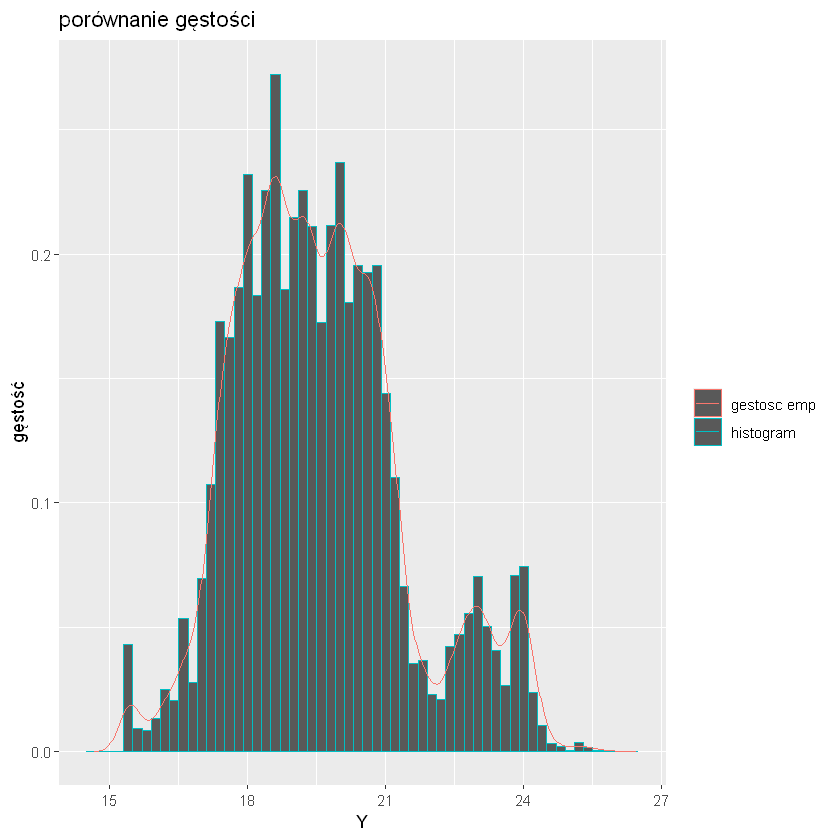

In [176]:
p <- ggplot() + geom_histogram(aes(x = Y, y = ..density.., color="histogram"), binwidth=0.2) +
geom_line(aes(x = df$x, y = df$y, color="gestosc emp")) + ylab("gęstość") + ggtitle("porównanie gęstości") +  
theme(legend.title = element_blank()) 
p 
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "y_hist.jpg")

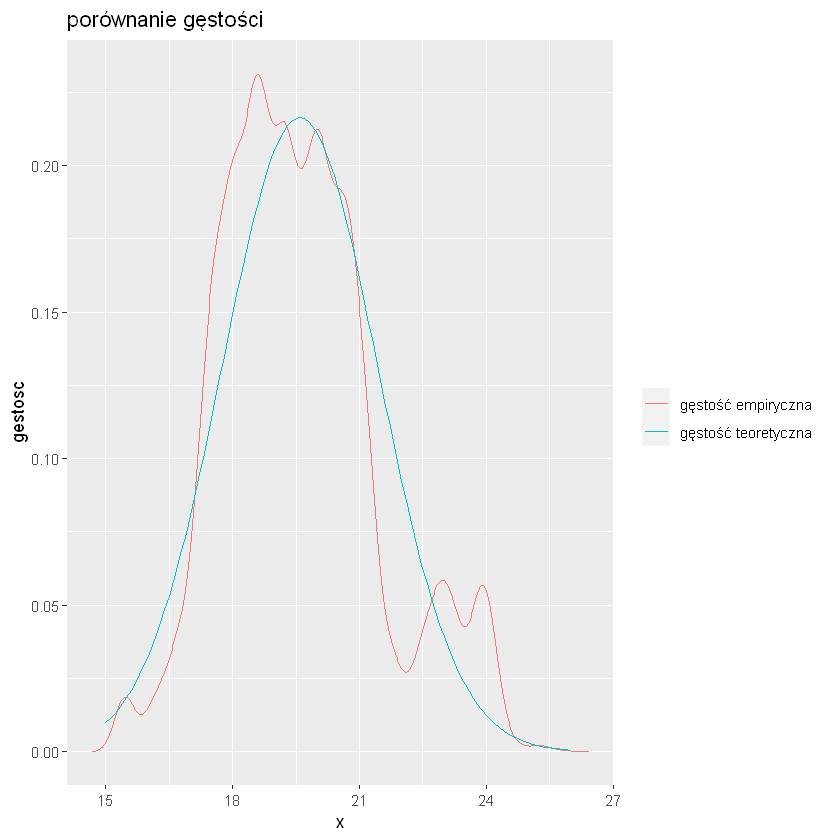

In [177]:
p <- ggplot() + geom_line(aes(x = df$x, y = df$y, color='gęstość empiryczna')) + 
geom_line(aes(x=seq(15,26,0.1), y = dnorm(seq(15,26,0.1), mean(Y), sqrt(var(Y))), color="gęstość teoretyczna")) +
xlab("x") + ylab("gestosc")  +  theme(legend.title = element_blank()) + ggtitle("porównanie gęstości")
p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "y_dens.jpg")

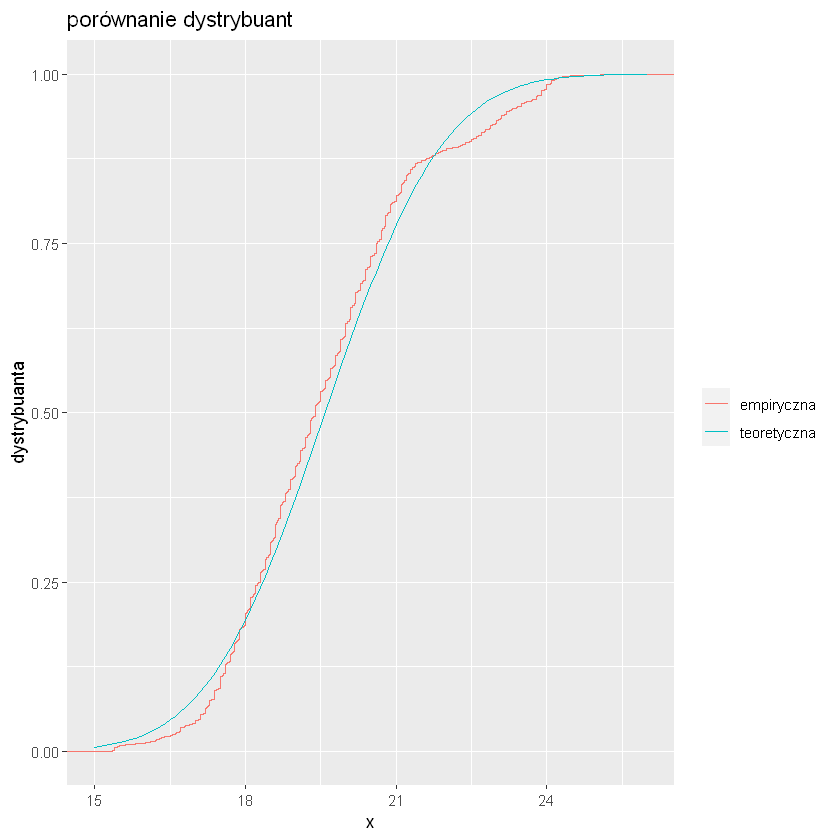

In [178]:
##można się pobawić i znaleźć w tym jakieś dwa normalne ale czy jest sens to watpie XD W każdym razie przypomina troche 
##jakiś rozkład dwumodalny
p <- ggplot() + stat_ecdf(aes(Y, color="empiryczna")) +
geom_line(aes(x=seq(15,26,0.1), y = pnorm(seq(15,26,0.1), mean(Y), sqrt(var(Y))), color="teoretyczna"))+
xlab("x") + ylab("dystrybuanta")  +  theme(legend.title = element_blank()) + ggtitle("porównanie dystrybuant") +
theme(legend.title = element_blank())
p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "y_dis.jpg")

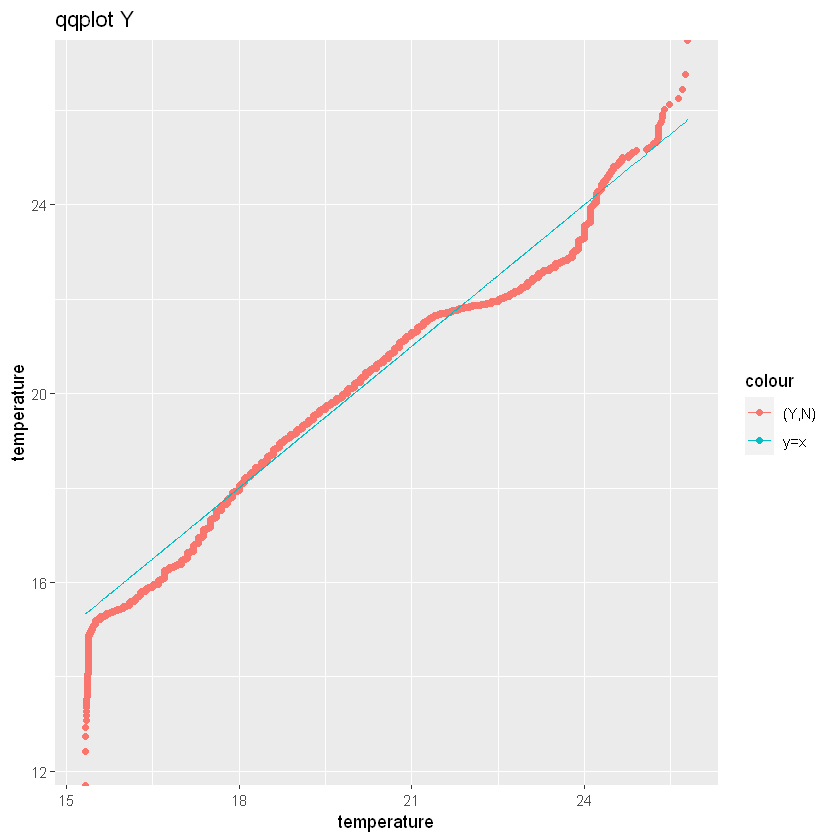

In [179]:
p2 <- ggplot() + 
  geom_point(aes(x= sort(Y), y =  qnorm(seq(0,1,length.out = n), mean(Y), sqrt(var(Y))), color="(Y,N)")) +
  geom_line(aes(x= Y, y = Y, color="y=x"))  + ggtitle('qqplot Y') + labs(x='temperature', y='temperature')
p2
ggsave(plot = p2, width = w, height = h, dpi = 300, filename = "y_qq.jpg")

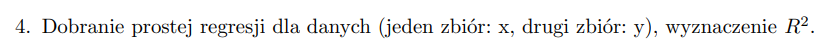

[1] 0.8852469

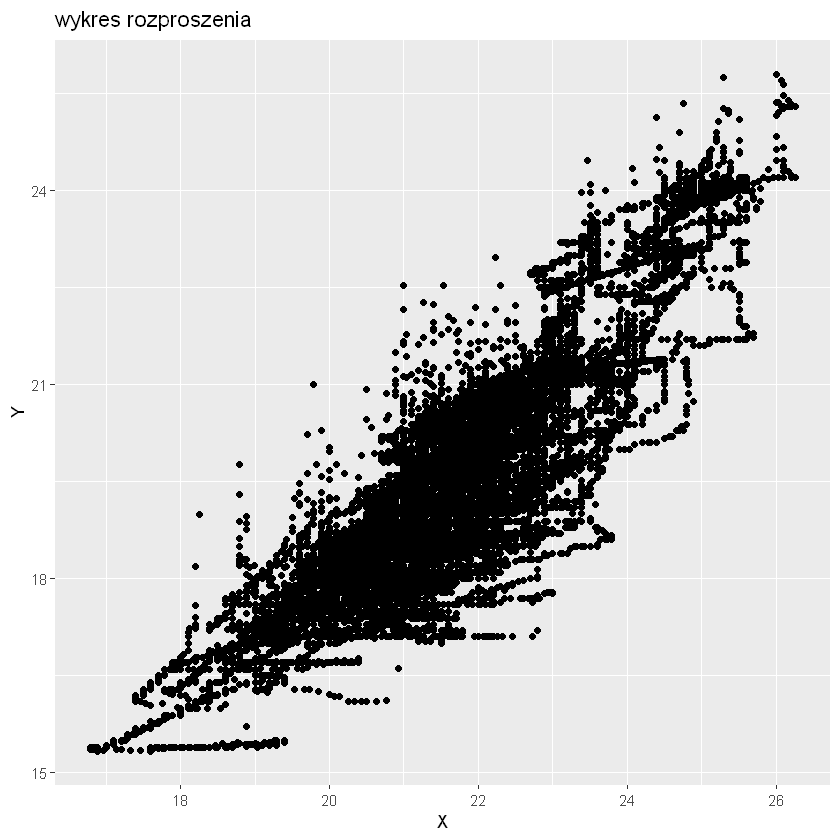

In [180]:
##wykres rozproszenia
p <- ggplot() + geom_point(aes(X, Y)) + labs(x="X", y= 'Y') + ggtitle("wykres rozproszenia")
p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "xy.jpg")
cor(X, Y)

In [28]:
##funkcja do liczenia współczynników prostej regresji liniowej

wsp <- function(dx, dy) {
    xs <- mean(dx)
    ys <- mean(dy)
    b1 <- sum((dx-xs)*dy)/sum((dx-xs)^2)
    b0 <- ys - b1*xs
    
    return(c(b0,b1))
}

In [150]:
w <- wsp(X,Y)
b0 <- w[1]
b1 <- w[2]
ys <- b0 + b1*X
prosta <- paste("y = ", round(b0,4), "+", round(b1,4), "x")

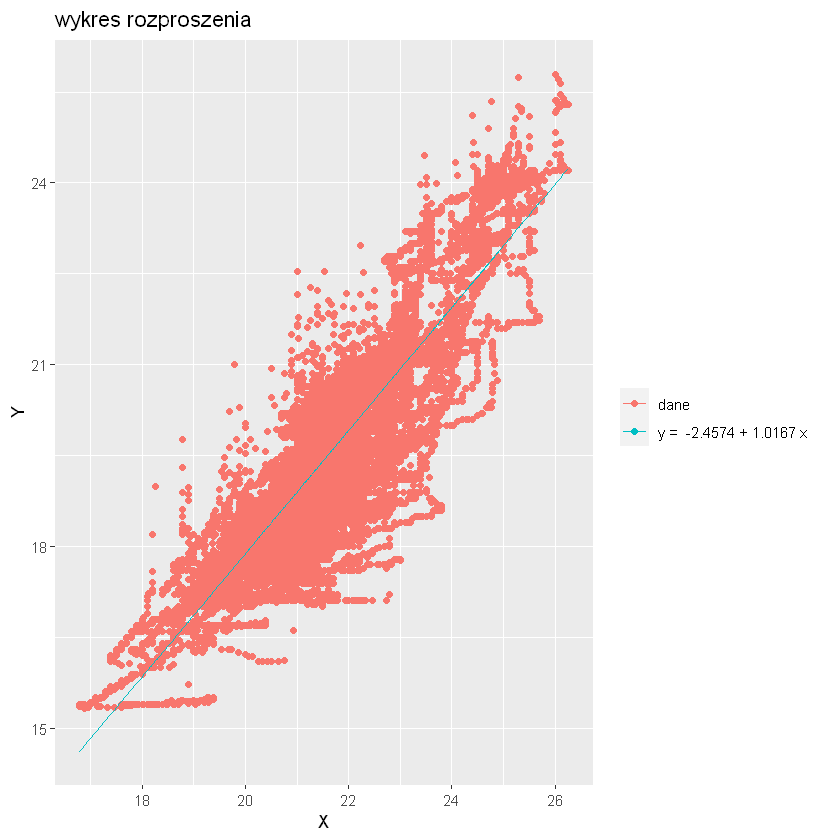

In [181]:
p <- ggplot() + geom_point(aes(X, Y, color="dane")) + geom_line(aes(X, ys, color=prosta)) +
labs(x="X", y= 'Y') + ggtitle("wykres rozproszenia") +  theme(legend.title = element_blank())
p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "xy_reg.jpg")

### $R^2 = \frac{SSR}{SST} = \frac{\sum(\hat{y_i} - \bar{y})^2}{\sum(y_i - \bar{y})^2}$ 

In [153]:
SSR <- sum((ys - mean(Y))^2)
SST <- sum((Y - mean(Y))^2)
SSE <- sum((Y - ys)^2)
SSE + SSR
SST

[1] 67147.6

[1] 67147.6

In [154]:
##R2 = 
SSR/SST

[1] 0.783662

In [155]:
df <- data.frame(X,Y)
model <- lm(Y~X, data=df)

In [156]:
summary(model)


Call:
lm(formula = Y ~ X, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5530 -0.5006  0.0948  0.5578  3.6387 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.457442   0.082698  -29.72   <2e-16 ***
X            1.016737   0.003803  267.36   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.858 on 19733 degrees of freedom
Multiple R-squared:  0.7837,	Adjusted R-squared:  0.7837 
F-statistic: 7.148e+04 on 1 and 19733 DF,  p-value: < 2.2e-16


In [157]:
prosta
SSR/SST

[1] "y =  -2.4574 + 1.0167 x"

[1] 0.783662

In [158]:
model$coefficients
summary(model)$r.squared

(Intercept)           X 
  -2.457442    1.016737

[1] 0.783662

yay wyszło dobrzee

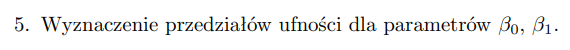

In [159]:
a <- 0.05
B0 <- b0
B1 <- b1
s_val <- sqrt(sum((Y - B0 - B1*X)^2)/(n-2)) 

b0_d <- B0 - qt(1-a/2, n-2)*s_val*sqrt(1/n + (mean(X))^2/sum((X-mean(X))^2)) 
b0_g <- B0 + qt(1-a/2, n-2)*s_val*sqrt(1/n + (mean(X))^2/sum((X-mean(X))^2)) 

b1_d <- B1 - qt(1-a/2, n-2)*s_val/sqrt(sum((X-mean(X))^2))
b1_g <- B1 + qt(1-a/2, n-2)*s_val/sqrt(sum((X-mean(X))^2))
b0_d
b0_g

b1_d
b1_g
c(b0,b1)


[1] -2.619536

[1] -2.295347

[1] 1.009283

[1] 1.024191

[1] -2.457442  1.016737

In [160]:
confint(model) 

,2.5 %,97.5 %
(Intercept),-2.619536,-2.295347
X,1.009283,1.024191


też się zgadza łuuu

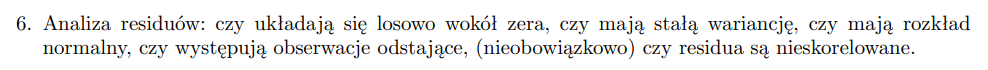

In [161]:
e <- Y - ys 

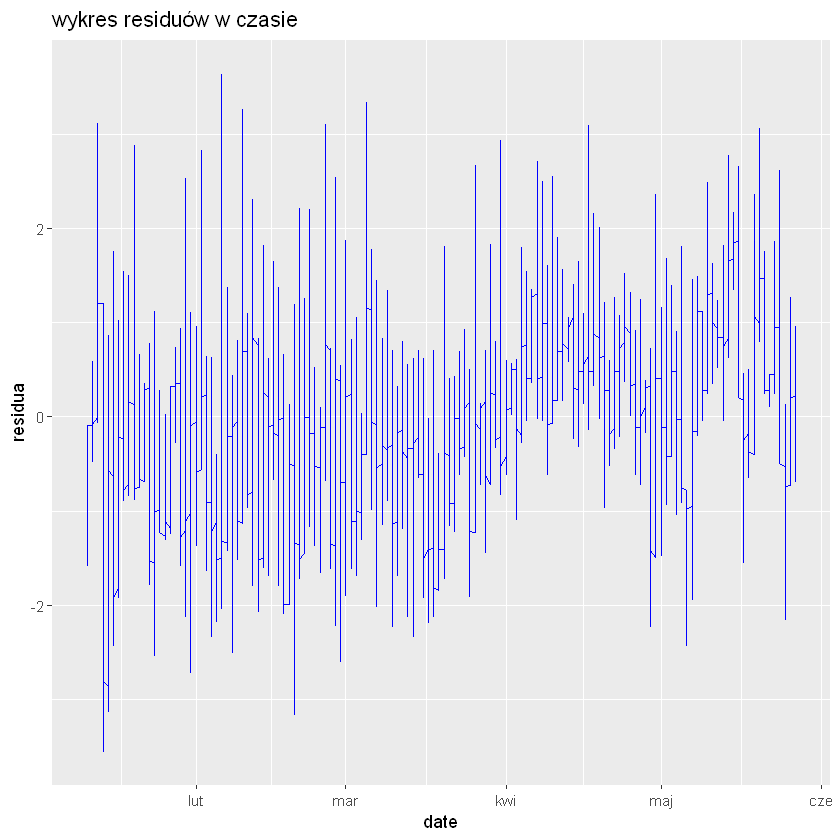

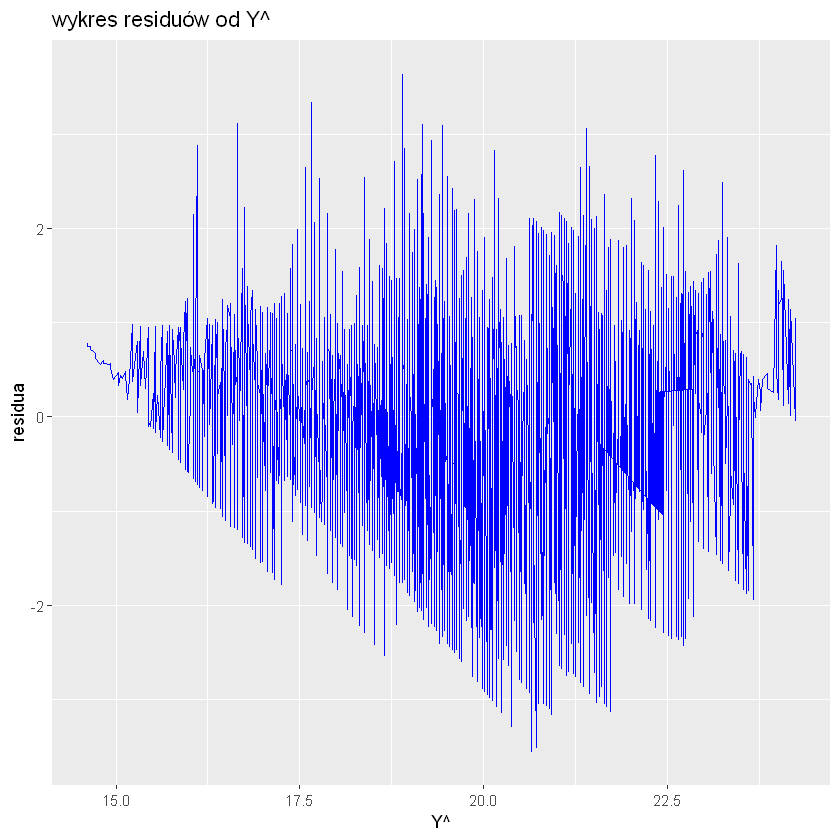

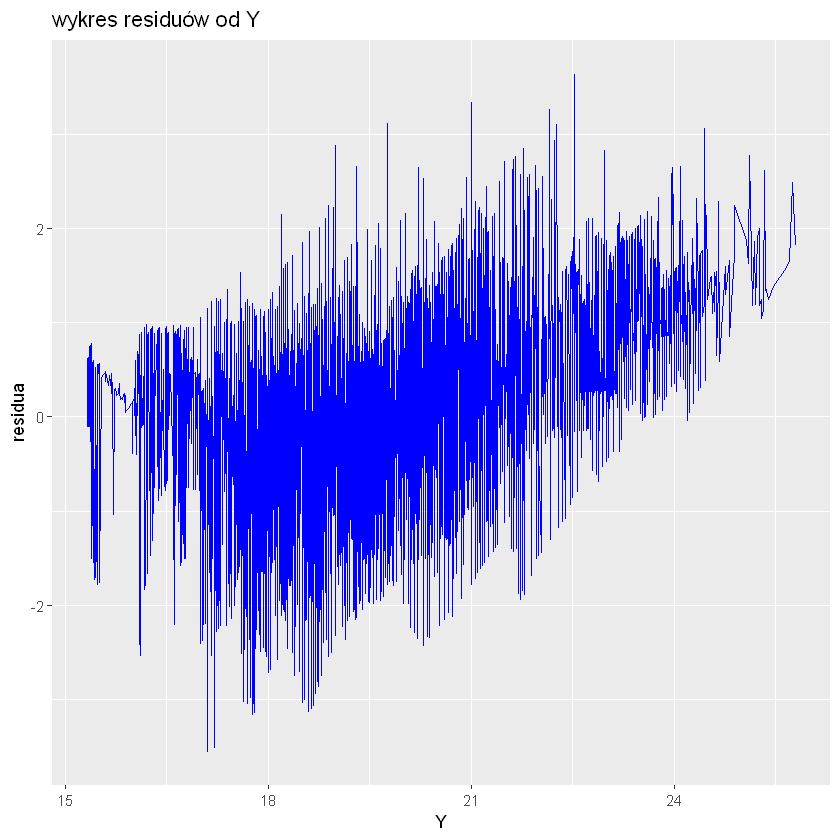

In [182]:
p <- ggplot() + geom_line(aes(dates, e), color = "blue") + labs(x = "date", y="residua") + ggtitle("wykres residuów w czasie")
p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "e_date.jpg")
p <- ggplot() + geom_line(aes(ys, e), color = "blue") + labs(x = "Y^", y="residua") + ggtitle("wykres residuów od Y^")
p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "e_Yr.jpg")
p <- ggplot() + geom_line(aes(Y, e), color = "blue") + labs(x = "Y", y="residua") + ggtitle("wykres residuów od Y")
p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "e_Y.jpg")

## ŚREDNIA I VAR


In [163]:
##średnia
mean(e)
##wariancja
var(e)

[1] 3.506359e-16

[1] 0.7361192

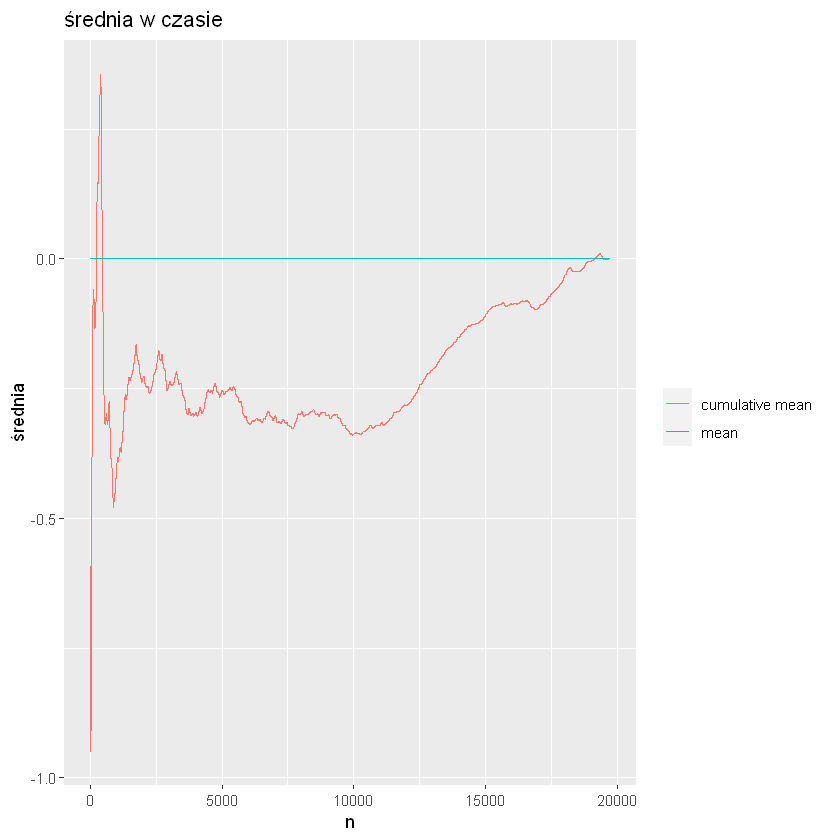

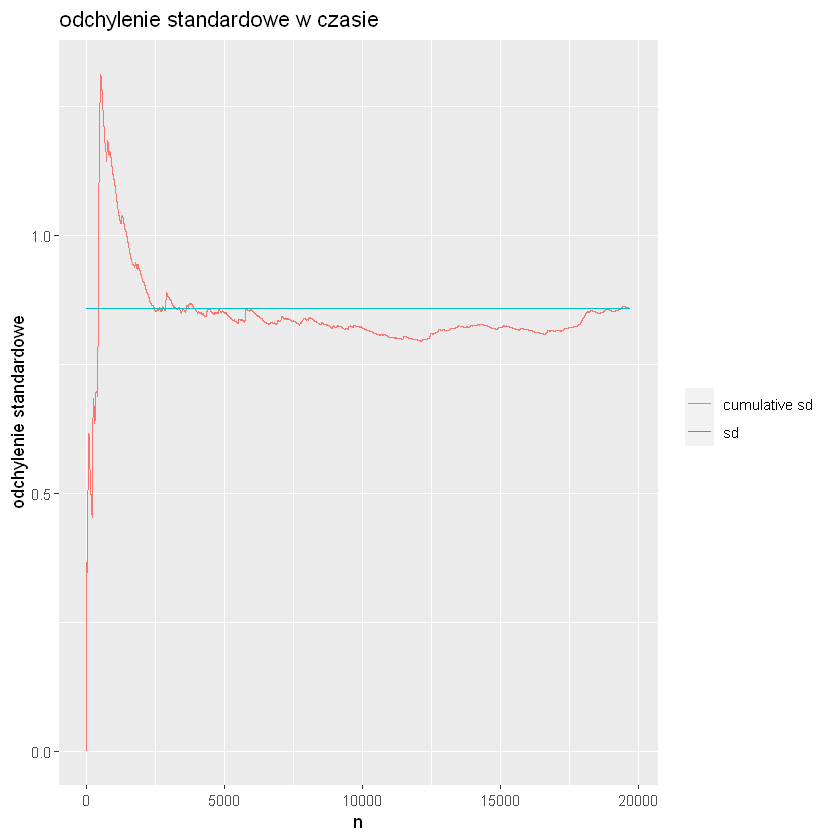

In [183]:
ns <- seq_along(e)
m <- cumsum(e)/ns

P <- ggplot() + geom_line(aes(ns, m, color="cumulative mean")) + 
geom_line(aes(ns, rep(mean(e), times = n), color="mean")) +
labs(x="n", y= 'średnia') + ggtitle("średnia w czasie") +  theme(legend.title = element_blank())
P
ggsave(plot = P, width = w, height = h, dpi = 300, filename = "mean_time.jpg")

v <- sapply(seq_along(e), function(i) sd(e[1:i]))[2:n]

p <- ggplot() + geom_line(aes(ns[2:n], v, color="cumulative sd")) + 
geom_line(aes(ns, rep(sqrt(var(e)), times = n), color="sd")) +
labs(x="n", y= 'odchylenie standardowe') + ggtitle("odchylenie standardowe w czasie") +  
            theme(legend.title = element_blank())
p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "sd_time.jpg")

## WYKRESY

In [184]:
df <- data.frame(x = density(e)$x, y = density(e)$y)

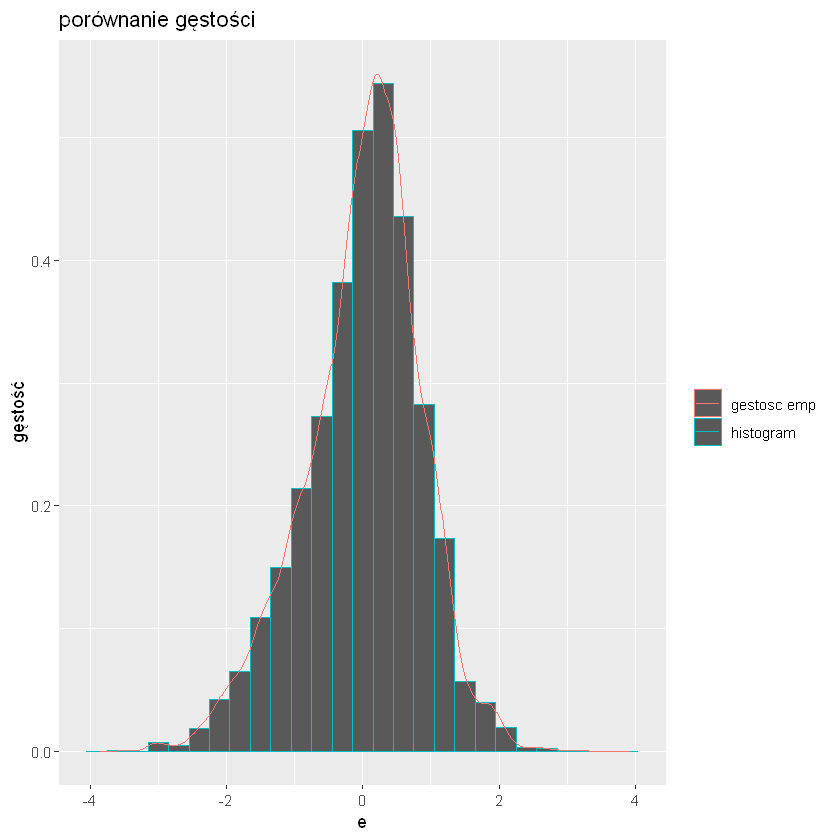

In [186]:
p <- ggplot() + geom_histogram(aes(x = e, y = ..density.., color="histogram"), binwidth=0.3) +
geom_line(aes(x = df$x, y = df$y, color="gestosc emp")) + ylab("gęstość") + ggtitle("porównanie gęstości") +  
theme(legend.title = element_blank()) 

p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "e_hist.jpg")

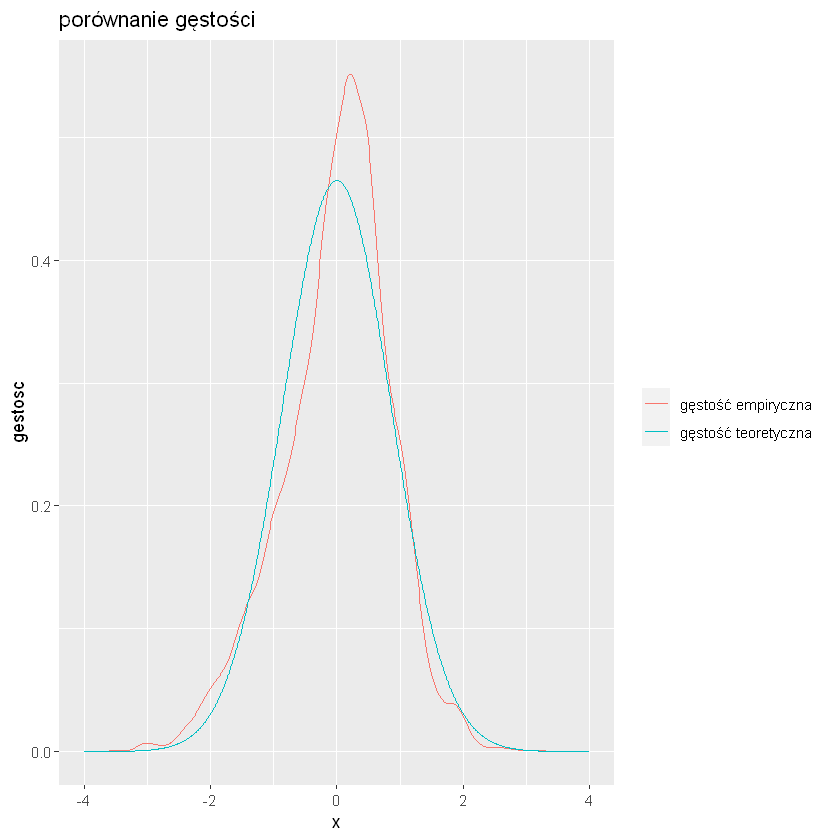

In [187]:
p <- ggplot() + geom_line(aes(x = df$x, y = df$y, color='gęstość empiryczna')) + 
geom_line(aes(x=seq(-4,4,0.01), y = dnorm(seq(-4,4,0.01), mean(e), sd(e)), color="gęstość teoretyczna")) +
xlab("x") + ylab("gestosc")  +  theme(legend.title = element_blank()) + ggtitle("porównanie gęstości")
p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "e_dens.jpg")

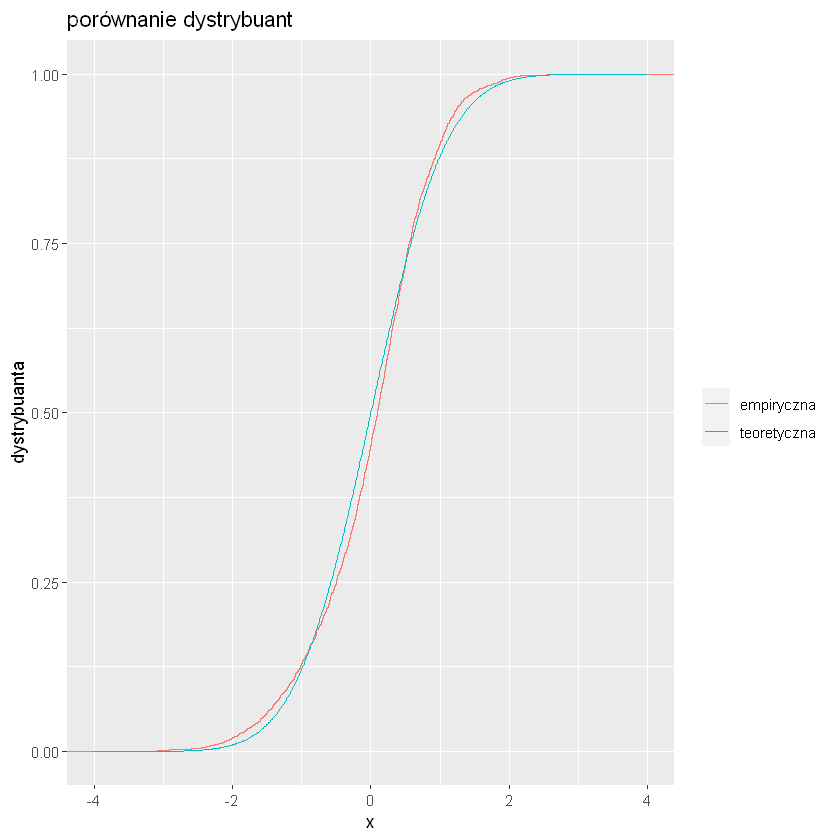

In [188]:
p <- ggplot() + stat_ecdf(aes(e, color="empiryczna")) +
geom_line(aes(x=seq(-4,4,0.01), y = pnorm(seq(-4,4,0.01), mean(e), sqrt(var(e))), color="teoretyczna"))+
xlab("x") + ylab("dystrybuanta")  +  theme(legend.title = element_blank()) + ggtitle("porównanie dystrybuant") +
theme(legend.title = element_blank()) 
p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "e_dis.jpg")

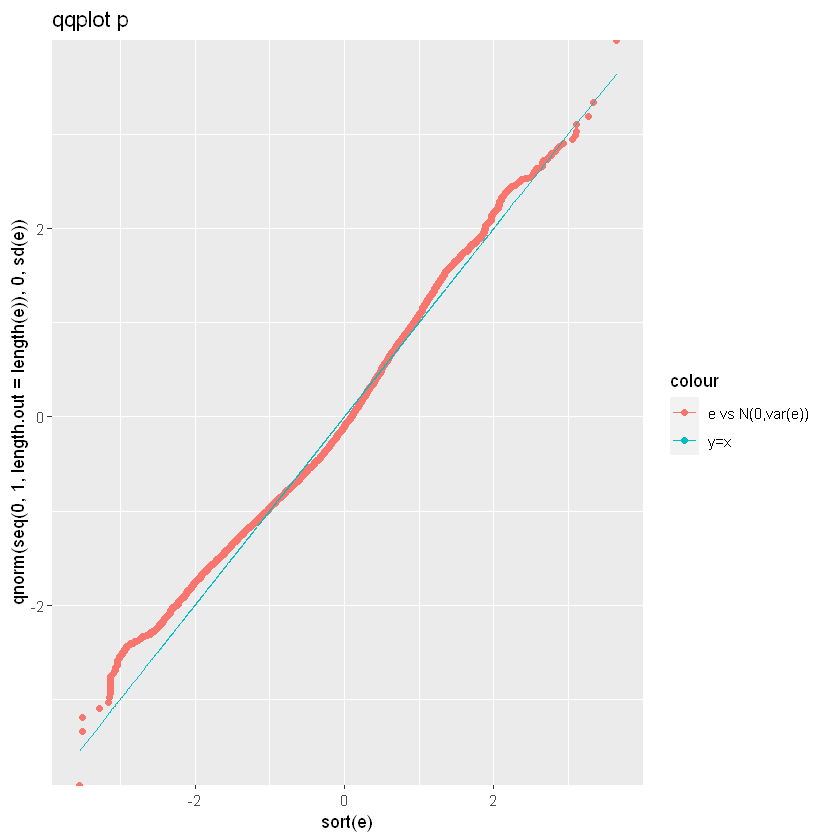

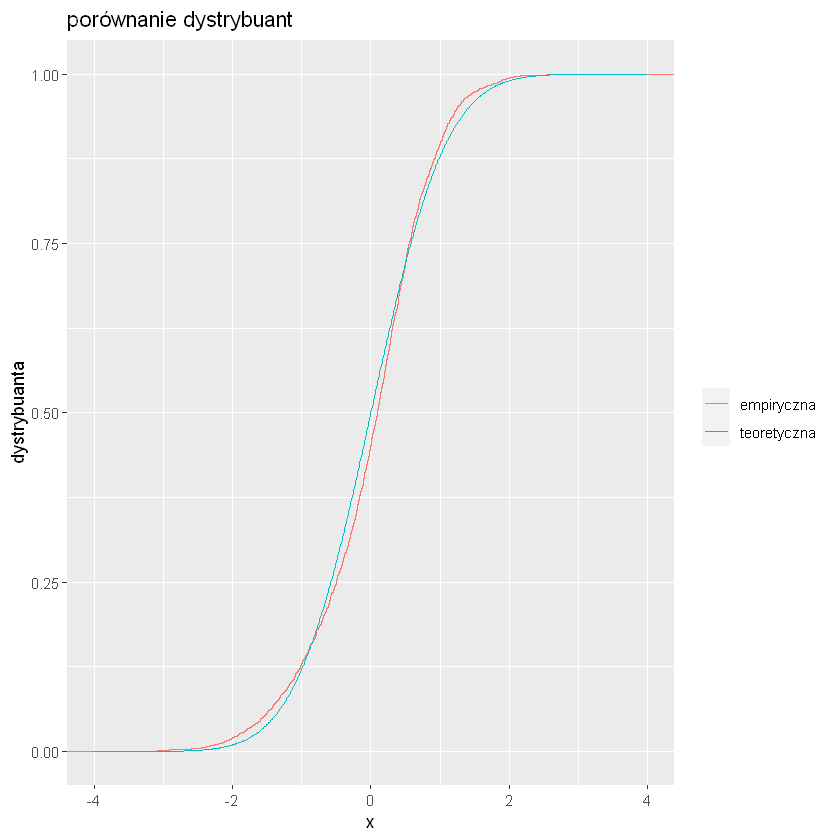

In [189]:
##qqplot
p2 <- ggplot() + 
  geom_point(aes(x= sort(e), y =  qnorm(seq(0,1,length.out = length(e)), 0, sd(e)), color="e vs N(0,var(e))")) +
  geom_line(aes(x= e, y = e, color="y=x"))  + ggtitle('qqplot p')
p2
p
ggsave(plot = p2, width = w, height = h, dpi = 300, filename = "e_qq.jpg")

## średnie i wariancje ruchome

In [190]:
ruchoma <- function(dane, m) {
    p <- (m-1)/2
    vals <- c()
    for (k in seq(p+1, length(dane)-p, 1)) {
        tk <- 0
        for (j in seq(-p,p,1)) {
            tk <- tk + dane[k+j]/(2*p+1)
        }
        vals <- append(vals, tk)
    }
    return(vals)
}

In [191]:
library("zoo")


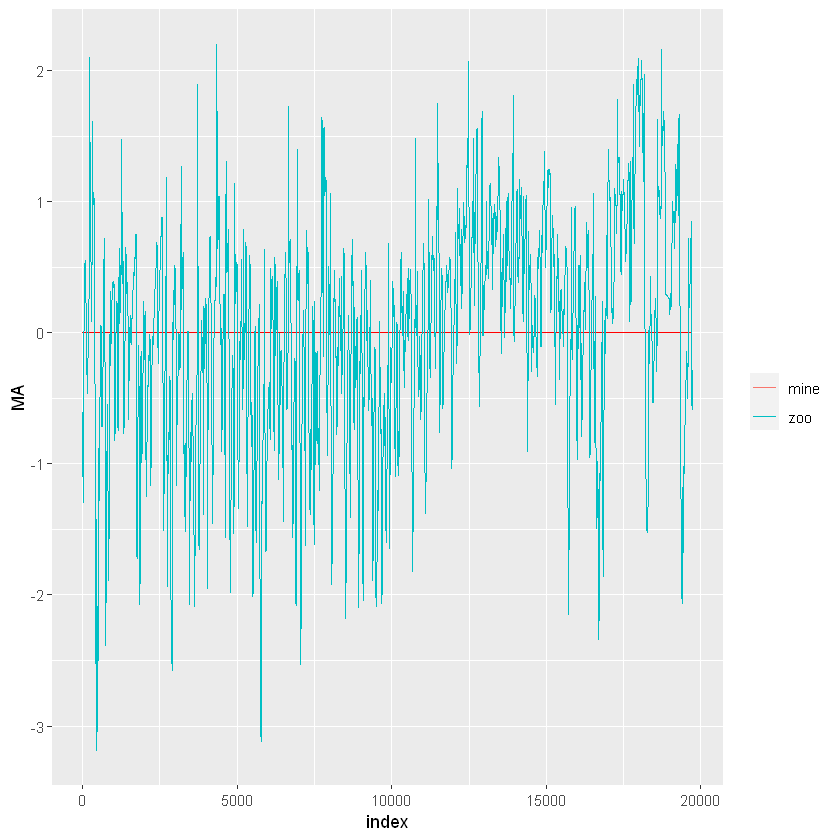

In [192]:
##moving average
vals11 <- ruchoma(e, 11)
x11 <- seq((length(e)-length(vals11))/2 +1 , length(vals11) +(length(e)-length(vals11))/2)
p <- ggplot() + geom_line(aes(x11, vals11, color="mine")) + geom_line(aes(x11, x11*0), color="red") +labs(x="index",y="MA") + 
geom_line(aes(x11, rollmean(e, 11), color="zoo")) + theme(legend.title = element_blank()) 

p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "MA.jpg")

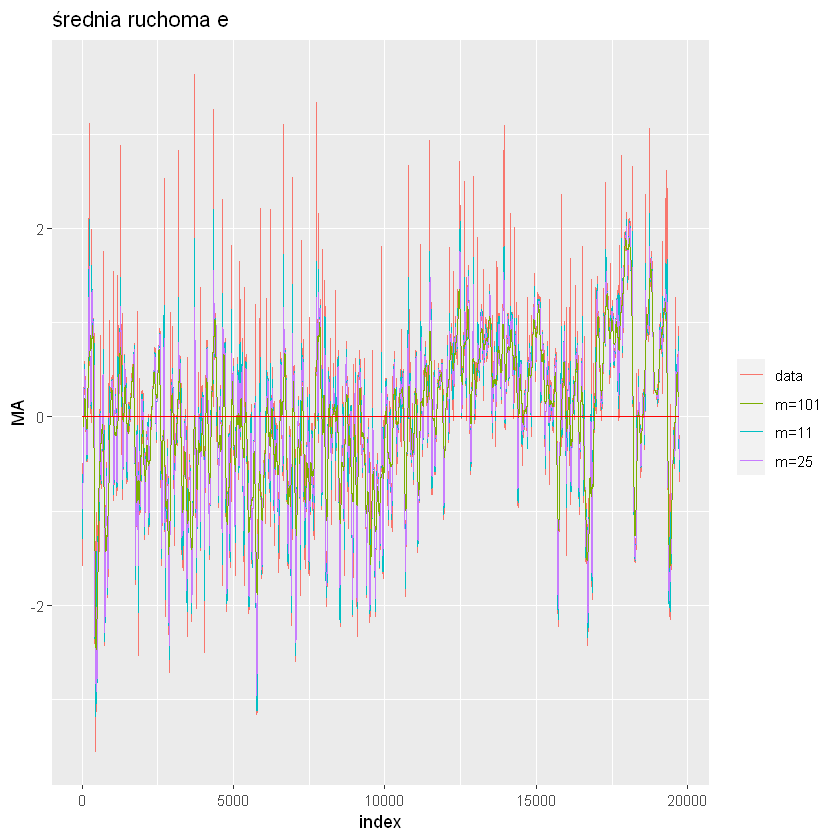

In [193]:
vals11 <- ruchoma(e, 11)
x11 <- seq((n-length(vals11))/2 +1 , length(vals11) +(n-length(vals11))/2)

vals101 <- ruchoma(e, 101)
x101 <- seq((n-length(vals101))/2 +1 , length(vals101) +(n-length(vals101))/2)

vals25 <- ruchoma(e, 25)
x25 <- seq((n-length(vals25))/2 +1 , length(vals25) +(n-length(vals25))/2)

xs <- seq(1, length(e), 1)
p <- ggplot() + geom_line(aes(xs, e, color="data")) +
geom_line(aes(x11, vals11, color="m=11")) + geom_line(aes(x25, vals25, color="m=25")) + 
geom_line(aes(x101, vals101, color="m=101")) + geom_line(aes(x11, x11*0), color="red") +
labs(x="index",y="MA") + ggtitle("średnia ruchoma e") + theme(legend.title = element_blank()) 

p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "MA_2.jpg")

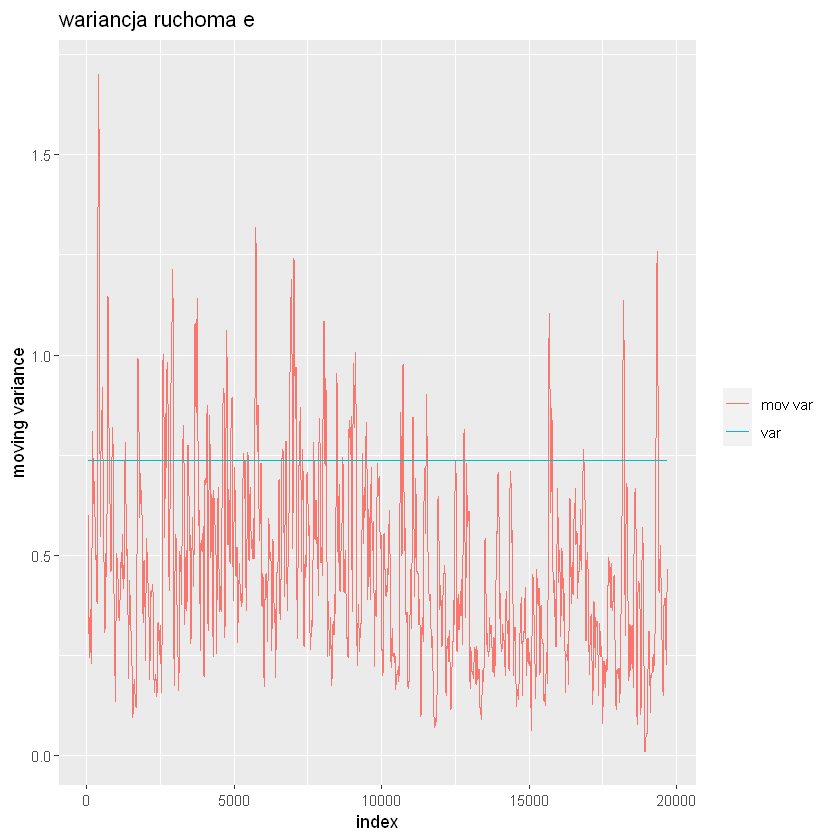

In [194]:
##moving variance


p <- ggplot() + geom_line(aes(x101, rollapply(e, width = 101, FUN = sd), color="mov var")) + 
geom_line(aes(x101, rep(var(e), length(x101)), color="var")) +
labs(x="index",y="moving variance") + ggtitle("wariancja ruchoma e") + theme(legend.title = element_blank()) 
p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "MV.jpg")

średnia tak średnio wyszła (hehe), jest powyzej 0 od pewnego momentu, ale overall wychodzi blisko 0<br>
wariancja też taka prawie stała, ale nie do konca, srednia wyszła inna niz by to wynikało z wykresu

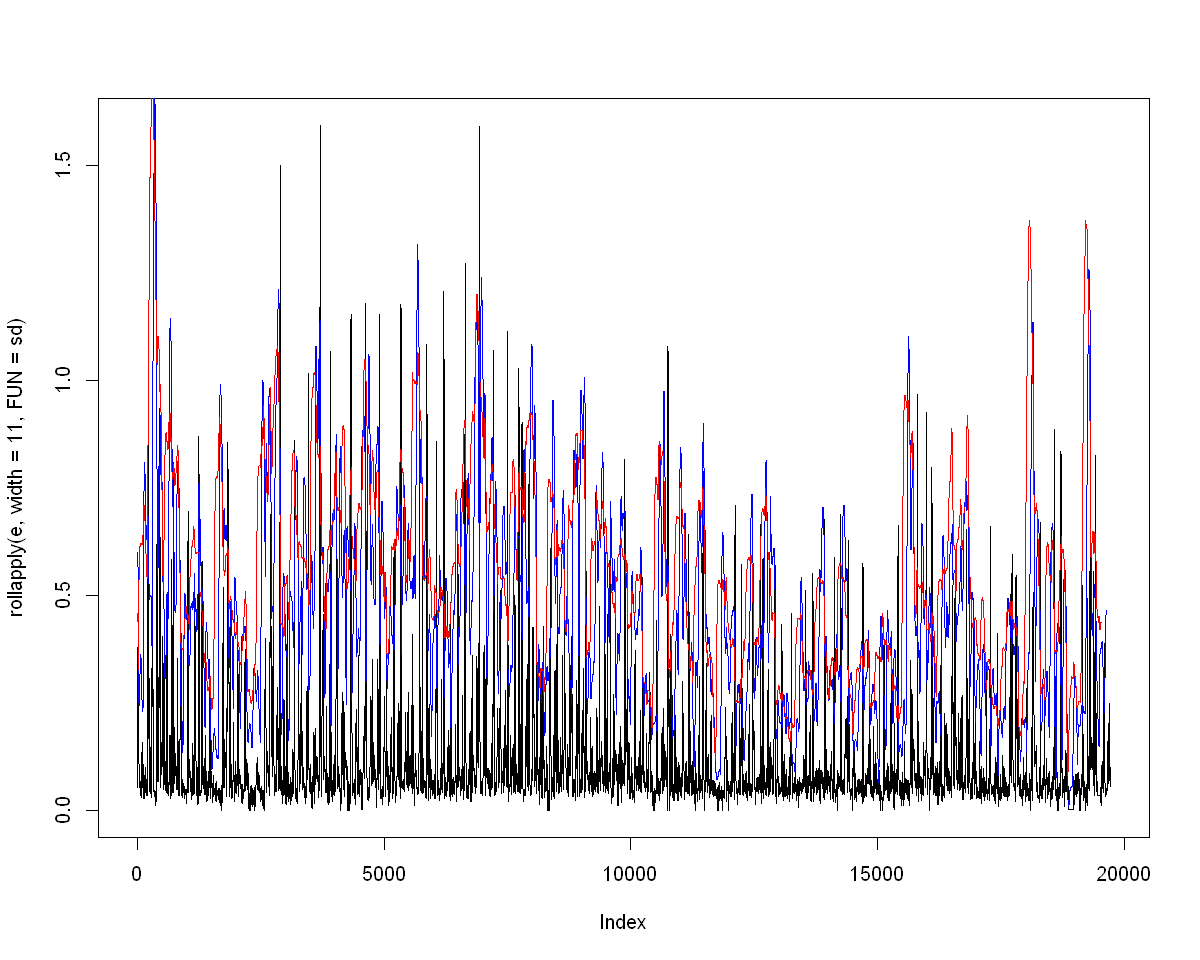

In [412]:
plot(rollapply(e, width = 11, FUN = sd), type="l")
lines(rollapply(e, width = 101, FUN = sd), col ="blue")
lines(rollapply(e, width = 201, FUN = sd), col ="red")

## KOŁMOGOROW - SMIRNOW

In [413]:
##test kołmogorowa-smirnowa
ks.test((e-mean(e))/sqrt(var(e)), "pnorm")

Warning message in ks.test.default((e - mean(e))/sqrt(var(e)), "pnorm"):
"wartości powtórzone nie powinny być obecne w teście Kolmogorowa-Smirnowa"



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  (e - mean(e))/sqrt(var(e))
D = 0.053442, p-value < 2.2e-16
alternative hypothesis: two-sided


p-value < 0.05 wiec odrzucamy hipotezę zerową, czyli nie możemy stwierdzić, że $e \sim \mathcal{N}(0,\sigma^2)$. Pochodzi z jakiegoś innego rozkładu

## BOXPLOT

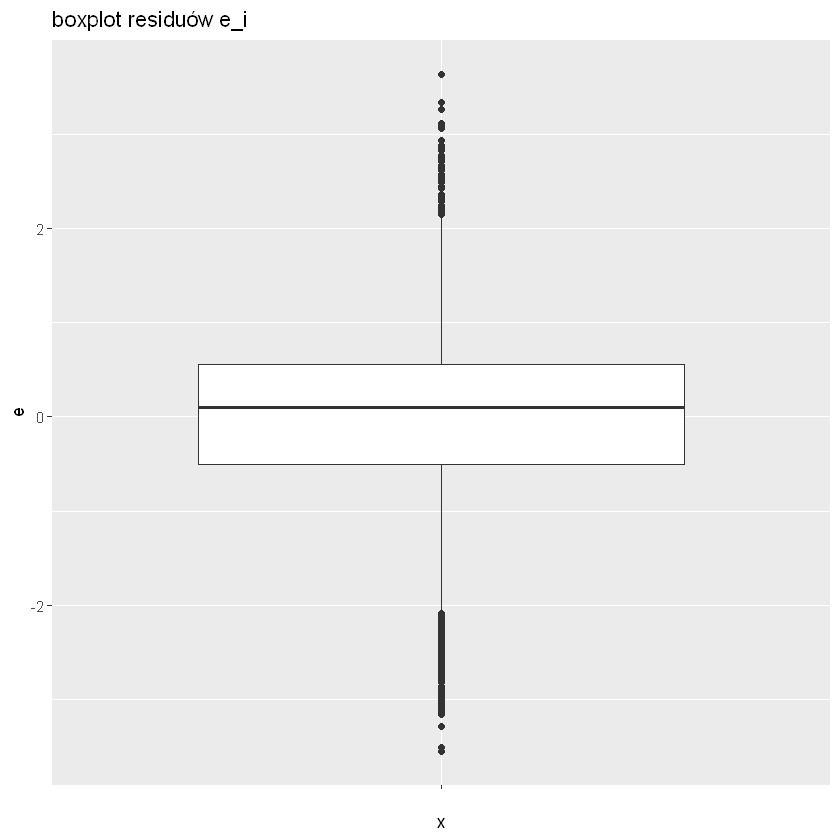

In [196]:
p <- ggplot() + geom_boxplot(aes(x="", y=e)) + ggtitle("boxplot residuów e_i")
p
ggsave(plot = p, width = w, height = h, dpi = 300, filename = "e_box.jpg")

jest troche tych wartosci odstających

## autokorelacja

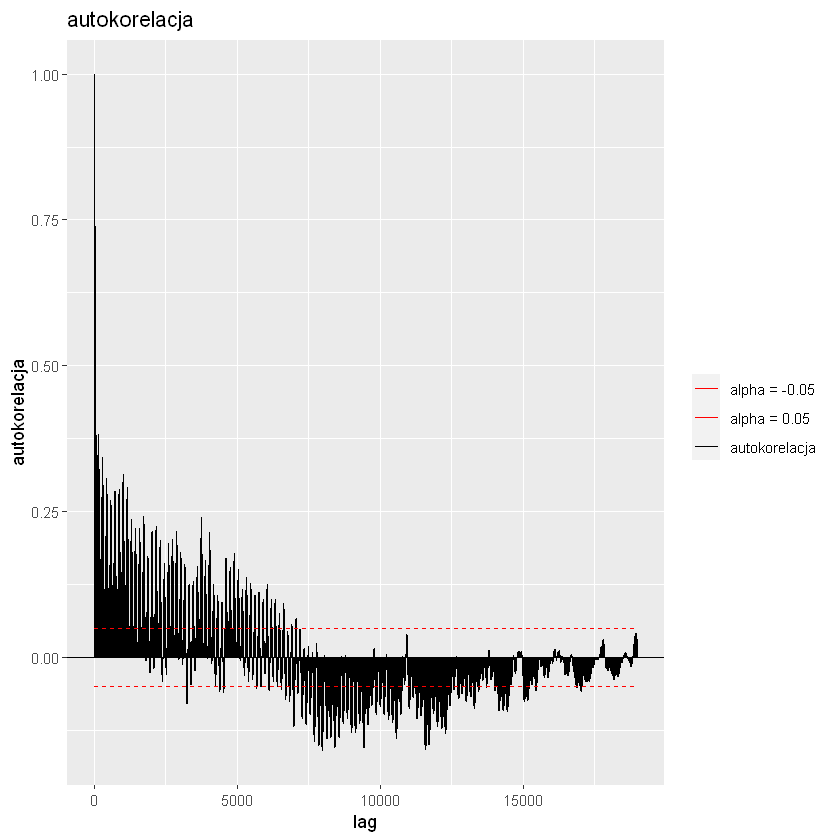

In [198]:
conf.level <- 0.95
ciline <- qnorm((1 - conf.level)/2)/sqrt(length(e))
bacf <- acf(e, 19000 , plot = FALSE)
bacfdf <- with(bacf, data.frame(lag, acf))
xs <- seq(0,19000,1)
l1 <- rep(0.05, length(xs))
l2 <- rep(-0.05, length(xs))

q <- ggplot(data = bacfdf, mapping = aes(x = lag, y = acf)) +
       geom_hline(aes(yintercept = 0)) +
       geom_segment(mapping = aes(xend = lag, yend = 0, color="autokorelacja")) + geom_line(aes(xs,l1, color="alpha = 0.05"), linetype = "dashed") +
geom_line(aes(xs,l2, color="alpha = -0.05"), linetype = "dashed") + theme(legend.title = element_blank()) + 
ggtitle("autokorelacja") + labs(x="lag", y="autokorelacja") +  scale_colour_manual(values = c("red", "red", "black"))
q

ggsave(plot = q, width = w, height = h, dpi = 300, filename = "autokor.jpg")

wnioski są takie, że nasze residua nie spełniają praktycznie żadnego założenia <br>
 - nie mają stałej  średniej równej 0
 - nie mają stałej wariancji (chociaż z nią nie jest akurat najgorzej, uszłaby)
 - nie są z rozkładu normalnego (ich rozkład nawet nie jest symetryczny)
 - ei są skorelowane, więc nie są niezależne (większość z nich przynajmniej) <br>
no więc kijowe te residua
 